# A/B Тестирование

## Задание с датасетом

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head(15)

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
5,936923,2017-01-10,A,0
6,679687,2017-01-19,B,1
7,719014,2017-01-17,A,0
8,817355,2017-01-04,B,1
9,839785,2017-01-15,B,1


In [2]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [3]:
# Перевод столбца с информацией о дате события (timestamp) в формат datetime
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')


In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    290482 non-null  int64         
 1   timestamp  290482 non-null  datetime64[ns]
 2   group      290482 non-null  object        
 3   converted  290482 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.9+ MB


In [5]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [6]:
# группируем таблицу по дате и по группе, и вычислим количество пользователей, заходивших на сайт, и суммарное количество совершённых целевых действий

daily_data = ab_data.groupby(['timestamp', 'group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id':'users_count'})

In [7]:
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


Задание 4.1
<br>
Рассчитайте конверсию на каждый день по приведённой формуле. Результат занесите в столбец conversion. Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.

In [8]:
daily_data['conversion'] = daily_data['converted'] / daily_data['users_count'] * 100
daily_data.head()

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


In [9]:
#country_population.loc[country_population['country']=='Italy']
round(daily_data.loc[(daily_data['timestamp']=='2017-01-05') & (daily_data['group']=='A')]['conversion'], 2)


6    12.32
Name: conversion, dtype: float64

In [10]:
display(daily_data.head())

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


### Визуальный анализ конверсии в группах

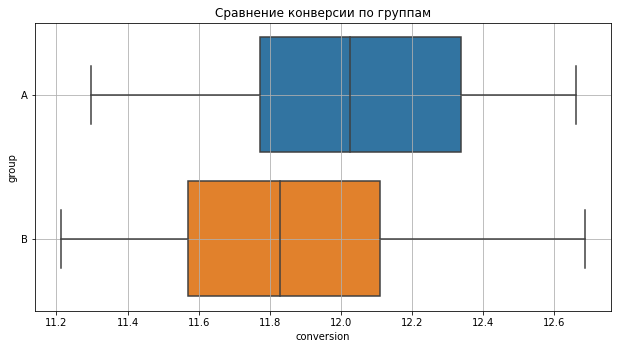

In [11]:
# Размер коробчатой диаграммы
fig = plt.figure(figsize=(8, 4))

# Добавим систему координат
ax = fig.add_axes([1, 1, 1, 1])

# Строим коробчатую диаграмму для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax)

# Добавим имя диаграммы
ax.set_title('Сравнение конверсии по группам')

# Отображаем сетку на диаграмме
ax.grid(True)

Вычислим среднее и медиану по группам

In [29]:
conversion_div = daily_data.groupby('group')['conversion'].agg(['mean', 'median'])
display(conversion_div)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


Отобразим конверсию в группе по каждому дню линейной диаграммой

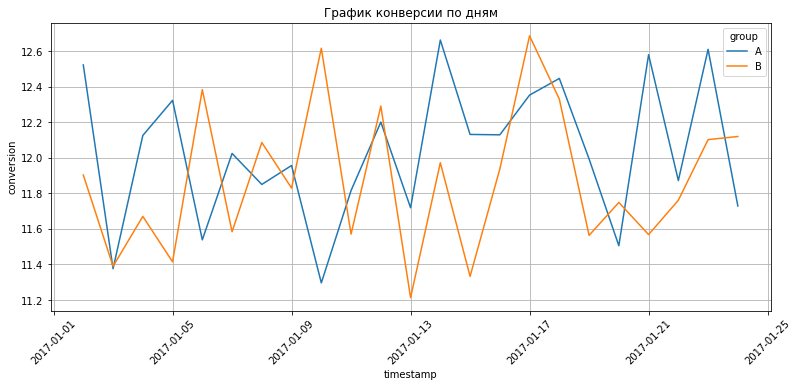

In [30]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([1, 1, 1, 1])
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group',
    ax=ax
)
ax.set_title('График конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.grid()

Создаем кумулятивные метрики
<br>Выберем данные для группы А и создадим в полученной таблице новый столбец cum_users_count, в который запишем результат работы метода cumsum() по столбцу users_count:

In [41]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())
daily_data_a.head()

C:\Users\dmitr\AppData\Local\Temp/ipykernel_18580/1803585366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806
6,2017-01-05,A,6419,791,12.322792,22427,2694,12.012307
8,2017-01-06,A,6604,762,11.538462,29031,3456,11.904516


Группируем данные по признаку группы, и в каждой группе будем вычислять кумулятивные суммы признаков количества посетителей (users_count) и количества совершённых целевых действий (converted)

In [15]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


Строим графики кумулятивной конверсии по дням в каждой группе:

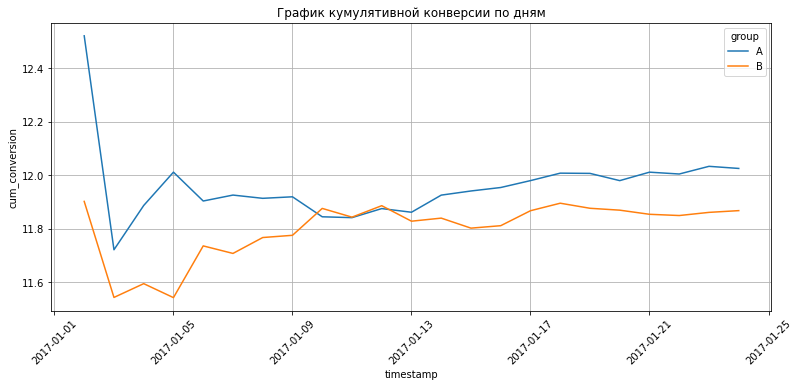

In [42]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(10, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Задание 4.6
<br>
Постройте таблицу со следующими ежедневными показателями:<br>
- количество посетителей сайта;<br>
- суммарное число транзакций;<br>
- общая сумма покупок (выручка).

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Чтение датасетов
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')

# Перевод столбца с информацией о дате события (timestamp) в формат datetime
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')

sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

# Перевод столбца с информацией о дате события (timestamp) в формат datetime
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')


# Соединим два датасета в один DataFrame
df_all = sample_a.append(sample_b, sort=False)
df_all.head()

C:\Users\dmitr\AppData\Local\Temp/ipykernel_18580/707743618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = sample_a.append(sample_b, sort=False)


,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [47]:
# Группируем таблицу по дате и по группе.
# Считаем по группам и датам сколько человек было на сайте и сколько активных действий совершено в день и выручка
# Переименовываем cid  в users_count, сбрасываем индексацию.
df_all_grouped = df_all.groupby(['date', 'group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid':'users_count'})

df_all_grouped.head(10)

,date,group,users_count,transactions,revenue
0,2020-11-06,A,2576,16,1577279
1,2020-11-06,B,2499,19,996645
2,2020-11-07,A,2704,23,1721886
3,2020-11-07,B,2804,19,555499
4,2020-11-08,A,3354,25,846051
5,2020-11-08,B,3291,24,3044842
6,2020-11-09,A,3234,18,708830
7,2020-11-09,B,3062,25,1285836
8,2020-11-10,A,3022,29,826984
9,2020-11-10,B,3072,30,2414726


Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

In [58]:
# Количество посетителей сайта, суммарное число транзакций, общая сумма покупок в группе А на 8 ноября 2020 года
df_all_grouped.loc[(df_all_grouped['date']=='2020-11-08') & (df_all_grouped['group']=='A')]

,date,group,users_count,transactions,revenue
4,2020-11-08,A,3354,25,846051


Задание 4.7
<br>Добавьте в каждую из таблиц кумулятивные метрики:
<br>- кумулятивное количество посетителей сайта;
<br>- кумулятивное суммарное число транзакций;
<br>- кумулятивная общая сумма покупок (кумулятивная выручка).
<br><br>Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).
<br><br>Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [21]:
# Добавляем кумулятивную метрику "users_count"
df_all_grouped['cum_users_count'] = df_all_grouped.groupby(['group'])['users_count'].cumsum()

# Добавляем кумулятивную метрику "transactions"
df_all_grouped['cum_transactions'] = df_all_grouped.groupby(['group'])['transactions'].cumsum()

# Добавляем кумулятивную метрику "revenue"
df_all_grouped['cum_revenue'] = df_all_grouped.groupby(['group'])['revenue'].cumsum()

# Добавляем кумулятивную метрику "кумулятивная конверсия"
df_all_grouped['cum_conversion'] = df_all_grouped['cum_transactions']/df_all_grouped['cum_users_count']*100

# Добавляем кумулятивную метрику "кумулятивный средний чек"
df_all_grouped['cum_average_check'] = df_all_grouped['cum_revenue']/df_all_grouped['cum_transactions']

df_all_grouped.head(10)

,date,group,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_average_check
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
1,2020-11-06,B,2499,19,996645,2499,19,996645,0.760304,52455.000000
2,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
3,2020-11-07,B,2804,19,555499,5303,38,1552144,0.716576,40845.894737
4,2020-11-08,A,3354,25,846051,8634,64,4145216,0.741256,64769.000000
5,2020-11-08,B,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
6,2020-11-09,A,3234,18,708830,11868,82,4854046,0.690934,59195.682927
7,2020-11-09,B,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
8,2020-11-10,A,3022,29,826984,14890,111,5681030,0.745467,51180.450450
9,2020-11-10,B,3072,30,2414726,14728,117,8297548,0.794405,70919.213675


In [22]:
df_avg_convers_a = round(df_all_grouped[df_all_grouped['group']=='A']['cum_conversion'].mean(), 2)
df_avg_convers_a

df_avg_convers_b = round(df_all_grouped[df_all_grouped['group']=='B']['cum_conversion'].mean(), 2)
df_avg_convers_b

print("Средняя кумулятивная конверсия в группе \"A\" =", df_avg_convers_a, '\n' "Средняя кумулятивная конверсия в группе \"Б\" =", df_avg_convers_b)

Средняя кумулятивная конверсия в группе "A" = 0.71 
Средняя кумулятивная конверсия в группе "Б" = 0.76


Задание 4.8
<br>
Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

In [23]:
df_all_grouped.head(1)

,date,group,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_average_check
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.621118,98579.9375


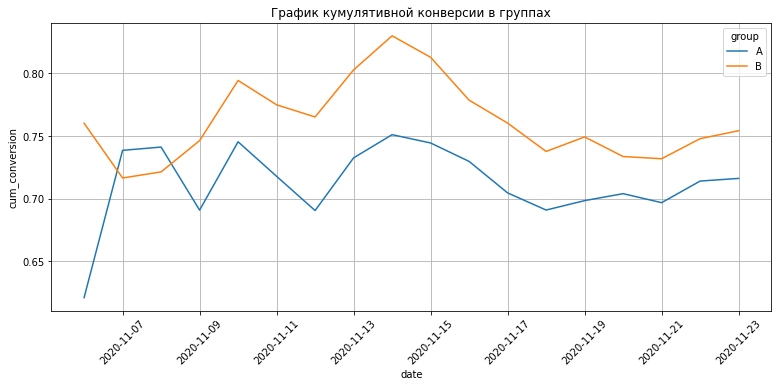

In [24]:
# создаём фигуру размером 10x4
fig = plt.figure(figsize=(10, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=df_all_grouped, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии в группах')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Задание 4.9
<br>
Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

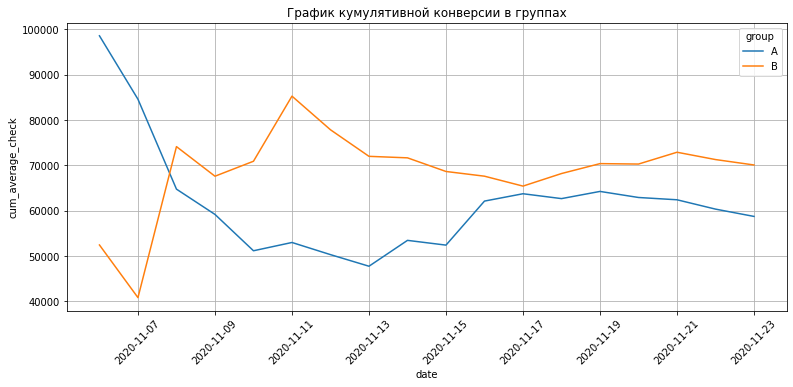

In [25]:
# создаём фигуру размером 10x4
fig = plt.figure(figsize=(10, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивного среднего чека во времени в каждой группе
sns.lineplot(x='date', y='cum_average_check', data=df_all_grouped, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии в группах')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Задание 5.4
<br>
Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: Ежедневный средний чек в группе А меньше, чем в группе B. Используйте функцию mannwhitneyu() из модуля scipy.stats. В качестве уровня значимости возьмите alpha = 0.01

In [26]:
#Средний чек в А меньше, чем в В (левосторенная = less)
from scipy.stats import mannwhitneyu

In [27]:
H0 = 'Ежедневный средний чек в группах одинаков.'
H1 = 'Ежедневный средний чек в группе А меньше, чем в В.'
alpha = 0.01 # статистическая значимость

results = mannwhitneyu(
    x = df_all_grouped[df_all_grouped['group']=='A']['cum_average_check'],
    y = df_all_grouped[df_all_grouped['group']=='B']['cum_average_check'],
    alternative = 'less'
)
print(results)

p_value = results.pvalue
# Выводим значение p_value
print('p_value:', round(p_value, 2))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H0))
    print('Альтернативная гипотеза. {}'.format(H1))

else:
    print('Принимаем нулевую гипотезу. {}'.format(H0))

MannwhitneyuResult(statistic=63.0, pvalue=0.0009153623248471153)
p_value: 0.0
Отвергаем нулевую гипотезу. Ежедневный средний чек в группах одинаков.
Альтернативная гипотеза. Ежедневный средний чек в группе А меньше, чем в В.


In [28]:


if p_value < alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H0))
    print('Альтернативная гипотеза. {}'.format(H1))

else:
    print('Принимаем нулевую гипотезу. {}'.format(H0))

Отвергаем нулевую гипотезу. Ежедневный средний чек в группах одинаков.
Альтернативная гипотеза. Ежедневный средний чек в группе А меньше, чем в В.
